In [24]:
import cv2
import numpy as np
%matplotlib inline

# Основы OpenCV3

### Чтение изображения

In [2]:
image = cv2.imread('landscape.png')

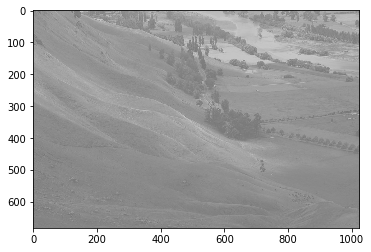

In [12]:
import matplotlib.pyplot as plt
plt.imshow(image, cmap='hot')

### Изменение размера изображения в 20 раз

**Интерполяция** - нахождение промежуточных значений случайной величины по имеющемуся дискретному набору данных

In [38]:
res_resize20 = cv2.resize(image, None, fx=20, fy=20, interpolation = cv2.INTER_CUBIC) # input, output, масштаб по OX, масштаб по OY, интерполяция

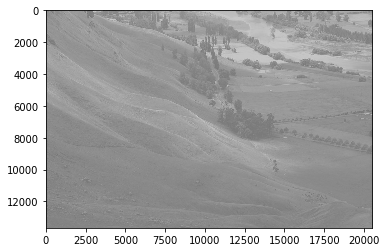

In [39]:
plt.imshow(res_resize20)

### Перемещение местоположения объекта

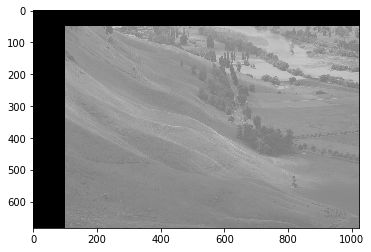

In [31]:
rows, cols = image.shape[0], image.shape[1]
M = np.float32([[1,0,100], [0,1,50]])
img_shifted = cv2.warpAffine(image, M, (cols, rows))

plt.imshow(img_shifted)

### Вращение изображения

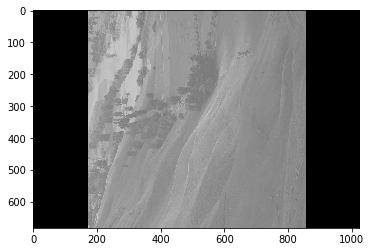

In [40]:
M = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1) # колонки, строки, угол, масштаб
rotated = cv2.warpAffine(image, M, (cols, rows))
plt.imshow(rotated)

# Можно также вращать изображение относительно желаемого пикселя (getRotationMatrix это позволяет)

### Афинные преобразования

Такие преобразования, при которых параллельные прямые остаются прямыми, однако на изображение можно посмотреть *как бы* с другого ракурса

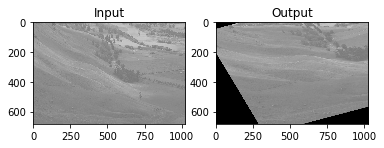

In [42]:
rows, cols, ch = image.shape
pts1 = np.float32([[50,50], [200,50], [50,200]])
pts2 = np.float32([[10,100], [200,50], [100,250]])

M = cv2.getAffineTransform(pts1, pts2)
affined = cv2.warpAffine(image, M, (cols,rows))
plt.subplot(121), plt.imshow(image), plt.title('Input')
plt.subplot(122), plt.imshow(affined), plt.title('Output')
plt.show()

### Perspective Transformation

In [46]:
# Посмотреть репозиторий ImageScanner.
# Суть: находятся четыре точки и они переносятся однообразным движением так, чтобы изображение можно было удобно прочесть

## Рисование на изображениях

In [ ]:
import numpy as np
import cv2


# Create a black image
img = np.zeros((512, 512, 3), np.uint8)

"""ЛИНИЯ"""
# Формат: изображение, на котором рисуем, стартовая координата, конечная координата, цвет линии, толщина линии
cv2.line(img, (0, 0), (511, 511), (255, 255, 0), 5)

"""ПРЯМОУГОЛЬНИК"""
# Формат: изображение, на котором рисуем, координата левого верхнего угла, координата правого нижнего угла, 
# цвет линий, толщина линий
cv2.rectangle(img, (384, 0), (510, 128), (0, 255, 0), 3)

"""КРУГ"""
# Формат: изображение, на котором рисуем, координата центра, радиус
cv2.circle(img,(447,63), 63, (0,0,255), -1)

"""ЭЛЛИПС"""
# Формат: изображение, на котором рисуем, координата центра, длина малой полуоси, длина большой полуоси,
# угол поворота (против часовой стрелки), начальное и конечная значения углов. 
cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)

"""POLYGON"""
# To draw a polygon, first you need coordinates of vertices. Make those points into an array 
# of shape ROWSx1x2 where ROWS are number of vertices and it should be of type int32. 
# Here we draw a small polygon of with four vertices in yellow color.
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(img,[pts],True,(0,255,255))

# If third argument is False, you will get a polylines joining all the points, not a closed shape.

# Чтение видео

In [ ]:
import numpy as np
import cv2
from skimage.io import imshow


cap = cv2.VideoCapture('vex.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame', gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Сохранение видео
Below code capture from a Camera, flip every frame in vertical direction and saves it.

## Находим объекты определённых цветов на видео

In [ ]:
cap = cv2.VideoCapture(0)
while True:
    # Take each frame
    _, frame = cap.read()
    
    # Convert BGR to HSV (HSV = Тон-Насыщенность-Яркость)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    
    # Threshold (фильтруем) the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    
    # Накладывание маски с помощью побитового "И"
    res = cv2.bitwise_and(frame, frame, mask=mask)
    cv2.imshow('frame', frame)
    cv2.imshow('mask', mask)
    cv2.imshow('res', res)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
        
cv2.destroyAllWindows()

### How to find HSV values to track?

This is a common question found in stackoverflow.com. It is very simple and you can use the same function, cv.cvtColor(). Instead of passing an image, you just pass the BGR values you want. For example, to find the HSV value of Green, try following commands in Python terminal:

> ```green = np.uint8([[[0,255,0 ]]])          
> hsv_green = cv.cvtColor(green,cv.COLOR_BGR2HSV)         
> print( hsv_green )      
> [[[ 60 255 255]]]    ```  

Now you take [H-10, 100,100] and [H+10, 255, 255] as lower bound and upper bound respectively.    

## Выделение признаков

**Детектор** - функция, локальные максимумы которой используем в качестве особенностей изображения.

### Детектор углов Харриса 
https://sohabr.net/habr/post/244541/

**Суть:** для выделения интерпретируемой информации из изображения нужно выделить особые точки.       
*Особая точка* - это точка, окрестность 5 на 5 пикселей которой можно отличить от любой другой особой точки.

"+"
+ Инвариантен к поворотам;
+ Частично инвариантен к афинным преобразованиям;

"-"
- Зависимость от шумов;
- Зависимость от масштабов.

In [ ]:
import numpy as np
import cv2
filename = 'example2.jpg'

img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst > 0.01*dst.max()]=[0, 0, 255]
cv2.imshow('dst', img)

(<matplotlib.axes._subplots.AxesSubplot at 0x11a92be90>,
 Text(0.5,1,'Output'))

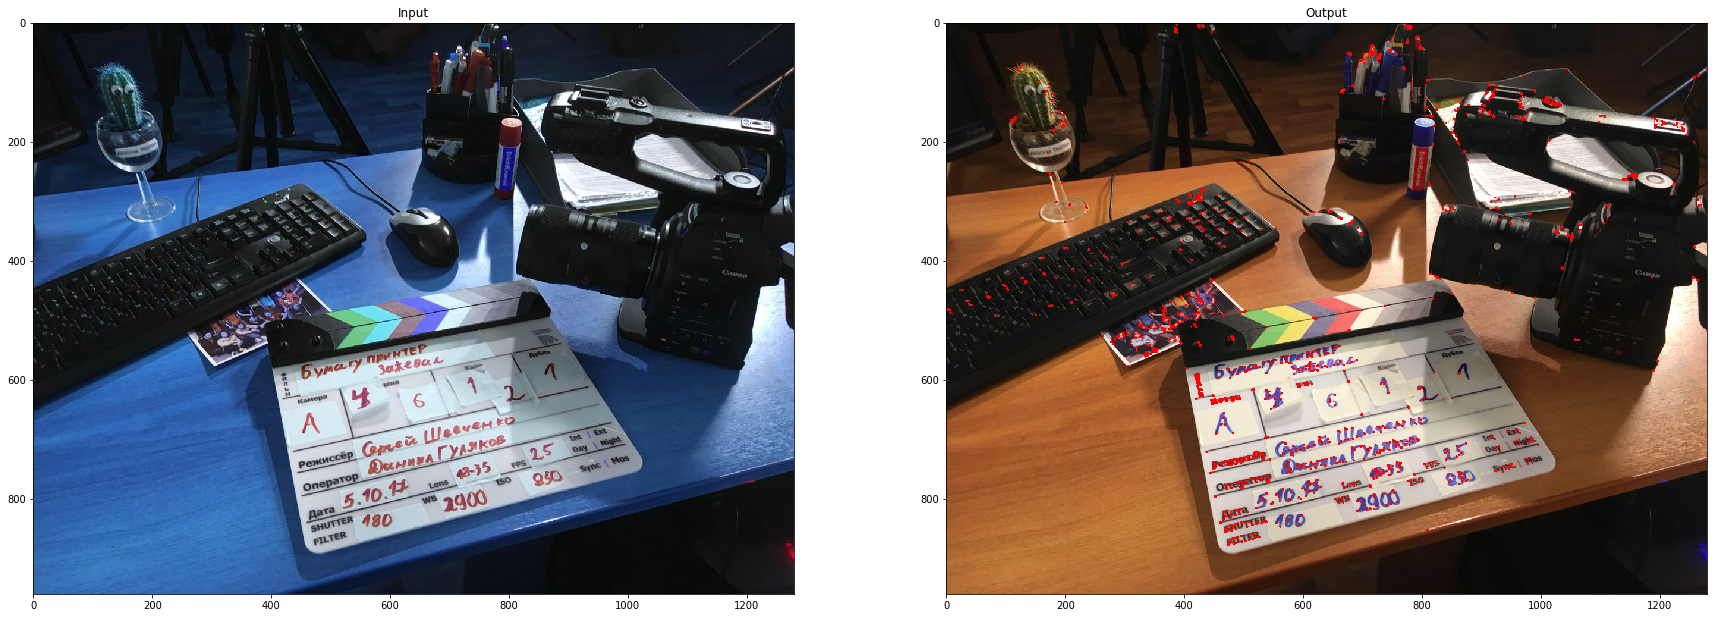

In [20]:
# Результат предыдущего листинга
input_img = cv2.imread('example5.jpg')
output_img = cv2.imread('example5_.jpg')

f = plt.figure(figsize=(30, 35))
plt.subplot(1,2,1), plt.imshow(input_img), plt.title('Input')
plt.subplot(1,2,2), plt.imshow(output_img), plt.title('Output')

# SIFT (Scale-Invariant Feature Transform)

Угол это или нет? Зависит от масштабов изображения.

![title](images/ex4.png)

Было бы здорово, чтобы алгоритм *сам* находил особую точку и говорил, какой у неё масштаб.      

**Суть:** при переходе от границы одного объекта к другому меняются яркости пикселей. Математически на это указывает локальные максимумы, выявляя отклики. Можно задать *пятно*, которое имеет маленький радиус, если его импульсная характеристика имеет два близко стоящих всплеска и, наоборот, большой радиус, если импульсная характеристика пятна имеет два далеко стоящих всплеска.    

Итог: масштаб определяется как локальный максимум откликов функции Лапласа. Берем точку -> применяем фильтр Лапласа со всё большим масштабом.

In [11]:
import numpy as np
import cv2
from skimage.io import imsave, imread, imshow # открывать через imread, а не cv2


img = imread('images/example5.jpg', 0)
print(type(img))
print(img.shape)
if img is None: 
    raise Exception("The path is incorrect")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(img, None)
img = cv2.drawKeypoints(gray, kp, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('sift.jpg', img)

<type 'numpy.ndarray'>
(960, 1280, 3)


True

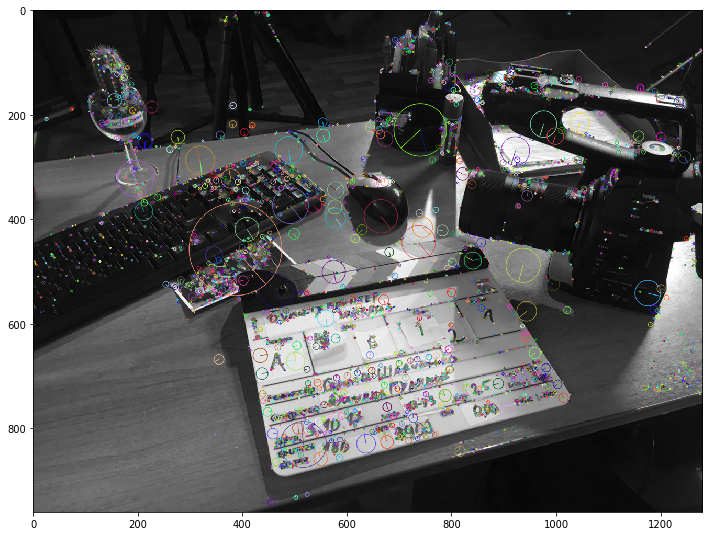

In [17]:
import matplotlib.pyplot as plt
# Результат предыдущего листинга

plt.figure(figsize=(10, 10))
imshow(img)

# FAST

![title](images/ex5.png)

*Идея:*      
Берётся рандомный пиксель.      
Если все рядом с ним стоящие 16 пикселей ярче - то данный пиксель - граница угла.      
Для повышения скорости работы алгоритм можно немного поменять: сравнивать яркости 1, 5, 9 и 13 пикселей. Если значения яркости этих пикселей **много больше** данного, то данный пиксель - граница угла

In [28]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from skimage.io import imread


img = imread('example5.png',0)
print(type(img))

# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()

# find and draw the keypoints
kp = fast.detect(img,None)

img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))

# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
cv.imwrite('fast_true.png',img2)

"""
# Disable nonmaxSuppression # прочитать про это на https://docs.opencv.org/3.4.1/df/d0c/tutorial_py_fast.html
fast.setNonmaxSuppression(0)
kp = fast.detect(img, None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
cv.imwrite('fast_false.png', img3)
"""

<type 'numpy.ndarray'>
Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 10130


'\n# Disable nonmaxSuppression # \xd0\xbf\xd1\x80\xd0\xbe\xd1\x87\xd0\xb8\xd1\x82\xd0\xb0\xd1\x82\xd1\x8c \xd0\xbf\xd1\x80\xd0\xbe \xd1\x8d\xd1\x82\xd0\xbe \xd0\xbd\xd0\xb0 https://docs.opencv.org/3.4.1/df/d0c/tutorial_py_fast.html\nfast.setNonmaxSuppression(0)\nkp = fast.detect(img, None)\nprint( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )\nimg3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))\ncv.imwrite(\'fast_false.png\', img3)\n'

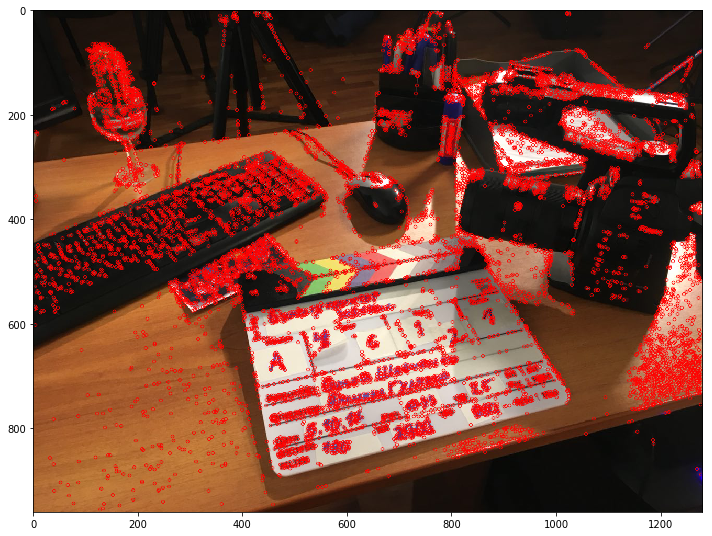

In [27]:
import matplotlib.pyplot as plt
# Результат предыдущего листинга

plt.figure(figsize=(10, 10))
imshow(img2)

# Feature Matching + Homography to find Objects

*Идея:* Brute-Force matcher takes the descriptor of one feature in first set and is matched with all other features in second set using some distance calculation. And the closest one is returned.

**Дескриптор** - лексическая единица, служащая для описания основного смыслового содержания документа

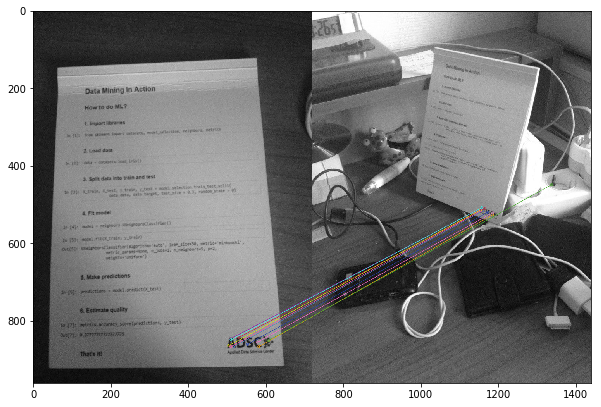

In [32]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


img1 = cv.imread('images/1.jpg', 0)    # queryImage
img2 = cv.imread('images/2.jpg', 0)    # trainImage

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key=lambda x:x.distance)

# Draw first 10 matches.
plt.figure(figsize=(10, 10))
img3 = cv.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=2)
plt.imshow(img3), plt.show();

# Детектор гранниц Canny

Шаги детектора:     
- Убрать шум и лишние детали из изображения;      
- Рассчитать градиент изображения;       
- Сделать края тонкими (edge thinning);       
- Связать края в контура (edge linking).

Детектор использует фильтр на основе первой производной от гауссианы. 

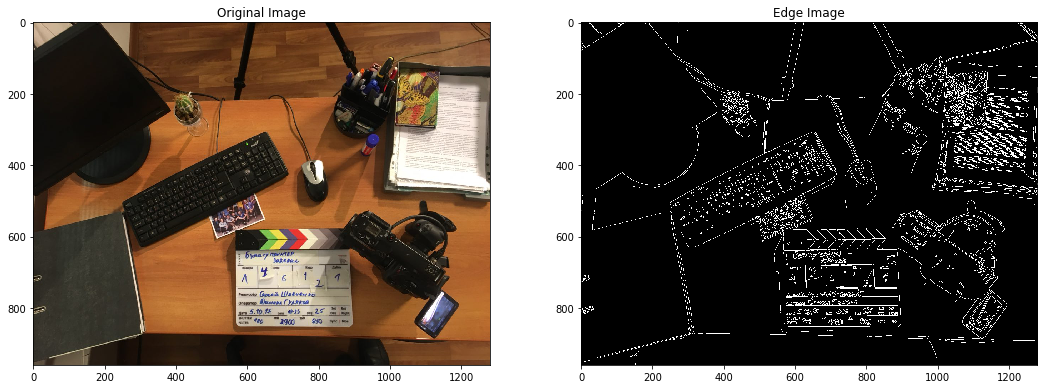

In [13]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from skimage.io import imread, imsave

img = imread('example4.jpg', 0)
plt.figure(figsize=(18, 18))
edges = cv.Canny(img, 100, 200)
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Edge Image')
plt.show()

# Каскад Хаара

Позволяет находить на изображении лица, глаза и прочие предметы, на которые натренирован классификатор.

Для этого необходимо:   

1) **Собрать выборку**:
   - изображений, где требуемый объект присутствует;
   - изображений, где такого объекта нет.
   
2) **Выделить признаки**.       
Каждый признак в изображении - это разность между суммой пикселей (начиная с текущего вроде) под белым прямоугольником и суммы пикселей под чёрным.
Признаков получится очень много (на картинку 24 * 24 пикселя порядка 16000 признаков).
![title](images/ex6.png)

3) **Сделать изображение интегральным** (чтобы считать сумму пикселей быстрее).                

*Постановка задачи*      

Пусть имеется изображение, где $n$ пикселей по вертикали и $n$ по горизонтали. Размер такого изображения: $n^2$. И имеется ядро размера $k^2$ (тоже $k*k$). Для применения ядра к изображению потребуется $n^{2}k^{2}$ операций. Это много. Для больших изображений с бОльшим количеством пикселей операция будет занимать слишком много времени. 

*Что делать*

Интегрировать изображение посредством ```skimage.transform.integral_image```.     
![title](images/ex7.png)    
В получившимся изображении будет подсчитана сумма пикселей от левого верхнего угла до правого нижнего по всей области обработки (синей на картинке). Всё это нужно для того чтобы впоследствие по формуле $Sum = A+(B-1)-(C-1)-(D-1)$ (для прямоугольной области) можно было очень быстро найти сумму в произвольном прямоугольнике изображений (так как в такой функции нет зависимости от размера ядра, подробнее: https://stepik.org/lesson/61037/step/4?unit=38165). 

4) **Применить адаптивный бустинг**

Для того чтобы вычислить наиболее значимые признаки из 16000 признаков, каскад Хаара использует AdaBoost.

5) **Разбить признаки по группам, а затем задействовать каждую из групп признаков и смотреть, что получится**.

Какие-то признаки сгруппированы относительно ненужных областей, где, собственно говоря, требуемого объекта и нет. Такие группы заfailятся и произойдёт переход к следующей группе. Таким образом будут найдены области пикселей, где присутствует требуемый объект.

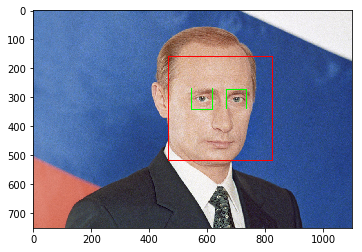

In [3]:
import numpy as np
import cv2
from skimage.io import imread, imshow, imsave
import matplotlib.pyplot as plt

path = '/Users/User/opencv/data/haarcascades/'

face_cascade = cv2.CascadeClassifier(path + 'haarcascade_frontalface_alt.xml') # opencv contains pretrained classifiers
eye_cascade = cv2.CascadeClassifier(path + 'haarcascade_eye.xml')

img = imread('/Users/User/Desktop/putin.jpg') 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

"""Now we find the faces in the image. If faces are found, it returns the positions of detected faces
as Rect(x, y, w, h) --> we can create a rectangle with eyes/face"""
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]   # roi = region of interest
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

plt.imshow(img, cmap='gray')

# Создание эффекта размытия при помощи box-фильтра

Чтобы создать эффект размытия изображения, свернем изображение с фильтром Гаусса.

(300, 400)


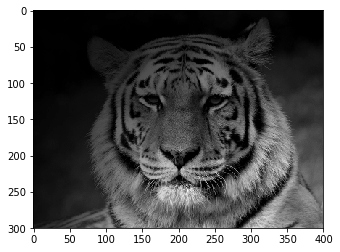

In [19]:
from skimage.io import imread, imsave, imshow, imshow_collection
import numpy as np
from scipy import signal
import warnings
warnings.filterwarnings("ignore") 
import matplotlib.pyplot as plt


def load_image(file_path):
    img = imread(file_path)
    print(img.shape)
    return img


def gaussian(shape, mean_x, mean_y, sigma_x, sigma_y):
    a = np.fromfunction(lambda y, x: -((x - mean_x) ** 2 / (2 * sigma_x ** 2) + (y - mean_y) ** 2 / (2 * sigma_y ** 2)), shape)
    return np.exp(a)


image = load_image('/Users/user/Desktop/computer_vision/images/tiger_gray.png')
gauss_filtered = gaussian(image.shape, 300, 400, image.shape[0] // 2, image.shape[1] // 2)
gauss_filtered = np.multiply(image, gauss_filtered).astype(np.uint8)
imsave('gauss_filtered.jpg', gauss_filtered)
plt.imshow(gauss_filtered, cmap='gray')

Теперь сделаем свертку.
Используем метод ```convolve2d``` из ```scipy.signal``` (свёртки раздельны):

[[ 38  36  36 ...   1   2   2]
 [ 38  36  37 ...   1   2   1]
 [ 40  37  38 ...   2   2   2]
 ...
 [141 141 137 ... 117 110 111]
 [111 101  95 ... 114 122 112]
 [ 97  97 109 ... 123 113 116]]


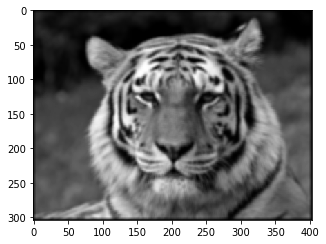

In [23]:
from scipy.signal import convolve2d
import skimage

plt.figure(figsize=(5, 5))
plt.imshow(convolve2d(skimage.color.rgb2gray(image), np.ones((5, 5))), cmap='gray')
print(image)

# Сегментация изображений

**Сегментация** - задача разбиения изображения на области, соответствующие различным объектам.        
**Сегментация изображения** = классификация каждого пикселя.

*Базовая идея:* методами компьютерного зрения обвести контуры на изображении, после чего применить глубокую нейросеть.       
*Проблема:* очень затратно в вычислениях. Если на вход подаётся изображение в высоком разрешении, то у нейросети будет очень много слоёв, и для обработки каждого пикселя по нескольким слоям будет необходимо очень много времени или будут нужны очень дорогие ресурсы.

In [2]:
# Пример кода в репозитории: github.com/andreqwert/opencv_projects

# Поиск лиц на изображениях

Испольщуется библиотека face_recognition.

+: правильно обрабатывает лица даже тех людей, которые наполовину повернулись.

-: выдает результат для 4 лиц четырьями картинками, на каждой из которых распознано одно лицо.      
В принципе это не столь важно, потому что скрипт на выходе выдаёт координаты точек.

In [3]:
from PIL import Image, ImageDraw
import face_recognition

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("lost.jpg")

# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    facial_features = [
        'chin',
        'left_eyebrow',
        'right_eyebrow',
        'nose_bridge',
        'nose_tip',
        'left_eye',
        'right_eye',
        'top_lip',
        'bottom_lip'
    ]

    for facial_feature in facial_features:
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Выходной результат - набор точек. Соединим их линией!
    pil_image = Image.fromarray(image)
    d = ImageDraw.Draw(pil_image)

    for facial_feature in facial_features:
        d.line(face_landmarks[facial_feature], width=5)

    pil_image.show()

I found 4 face(s) in this photograph.
The chin in this face has the following points: [(662, 163), (661, 171), (661, 179), (662, 187), (664, 195), (666, 203), (671, 209), (676, 214), (683, 216), (692, 216), (700, 213), (707, 208), (713, 203), (717, 195), (719, 187), (721, 179), (722, 171)]
The left_eyebrow in this face has the following points: [(665, 156), (669, 154), (674, 155), (678, 156), (683, 158)]
The right_eyebrow in this face has the following points: [(691, 160), (697, 159), (703, 159), (708, 160), (713, 162)]
The nose_bridge in this face has the following points: [(686, 165), (686, 171), (685, 176), (684, 182)]
The nose_tip in this face has the following points: [(678, 185), (681, 186), (683, 187), (687, 187), (690, 186)]
The left_eye in this face has the following points: [(669, 162), (672, 161), (676, 162), (679, 165), (675, 165), (672, 164)]
The right_eye in this face has the following points: [(696, 167), (699, 165), (703, 165), (707, 167), (703, 168), (699, 168)]
The to